In [47]:
import pandas as pd
import requests as req
import my_utils as mu
from tqdm import tqdm
from PIL import Image
from io import BytesIO
from oracle_test import OracleTools

In [2]:
champ = req.get('http://ddragon.leagueoflegends.com/cdn/13.8.1/data/ko_KR/champion.json').json()

In [4]:
oracle = OracleTools('lol_data', '1234', 1521)

In [ ]:
챔프 = oracle.test("SELECT EN_NAME FROM CHAMPNAME WHERE KR_NAME ='오른'")[0][0]
champ['data'][챔프]

In [48]:
def imageOpener(img_bytes: bytes):
    return Image.open(BytesIO(img_bytes))

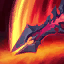

In [24]:
imageOpener(req.get('http://ddragon.leagueoflegends.com/cdn/13.8.1/img/spell/AatroxQ.png').content)

In [75]:
champ_image_rev = pd.read_csv('/7_LOL Project/lolproject-workspace/workspace_이주찬/230421_Get_All_Champion_image_revision.csv').sort_values('championId', ignore_index=True).drop('Unnamed: 0', axis=1)

In [76]:
cols = [champ_image_rev.columns[0]]+[a for a in champ_image_rev.columns[3:8]]
champ_images = champ_image_rev[cols].rename({a:a.upper() for a in cols}, axis=1)

In [71]:
# champ_images['SKIN_0'] = champ_images['SKIN_0'].apply(lambda x: x.split(',')[1][2:-2])

In [77]:
champ_images['PASSIVE'] = champ_images['PASSIVE'].apply(lambda x: 'https://ddragon.leagueoflegends.com/cdn/13.8.1/img/passive/'+x)

In [78]:
champ_images[champ_images.columns[2:6]] = champ_images[champ_images.columns[2:6]].apply(lambda x: 'https://ddragon.leagueoflegends.com/cdn/13.8.1/img/spell/'+x)

In [99]:
champ_images.columns

Index(['CHAMPIONID', 'PASSIVE', 'SPELL_Q', 'SPELL_W', 'SPELL_E', 'SPELL_R'], dtype='object')

In [97]:
err = []
for i, col in tqdm(enumerate(champ_images.iloc)):
    for skill in col[2:6]:
        if (now:=req.get(skill)).status_code != 200:
            err.append((i, col['CHAMPIONID']))

163it [05:21,  1.97s/it]
